# Spectrum Analysis in Audiopython
The spectral analysis features in `audiopython` are simply wrappers for functions in `scipy.fft`. In particular, `audiopython.spectrum` uses the `scipy.fft.rfft` and `scipy.fft.irfft` functions, as well as the `matplotlib.specgram` spectrogram. The wrappers simply do a little extra work for you.

In [2]:
import audiopython.audiofile
import numpy as np
import pandas as pd
import scipy.fft
import scipy.signal
import audiopython.spectrum
yamaha_map = audiopython.audiofile.load_yamaha()
a = audiopython.audiofile.read_wav(yamaha_map[54][0])

## 1. Compute the spectrum of a slice of an audio file
To compute the spectrum at a particular point in an audio file, you simply run `scipy.fft.rfft`.

In [2]:
window_size = 4096
spectrum_point = scipy.fft.rfft(np.reshape(a.samples[0, 44100:44100+window_size], (window_size)))
print(spectrum_point)

[-1005641.        +0.00000000e+00j -1047896.10985526+6.69839325e+04j
 -1030468.31259566+7.61828688e+04j ...    40900.73424064-7.00795333e+01j
    40499.57051152-1.97779356e+02j    41579.        +0.00000000e+00j]


You'll notice that the output of the FFT is an array of complex numbers. Each entry in the array corresponds to a particular frequency, and the complex number contains both the amplitude and phase of that frequency. To find the frequencies that correspond to each entry in the array, we can use `scipy.fft.rfftfreq`, and to extract the amplitudes and phases, we can use functionality from `audiopython`.

In [3]:
freqs = scipy.fft.rfftfreq(window_size, 1 / a.sample_rate)
amps, phases = audiopython.spectrum.fft_data_decompose(spectrum_point)
fft_info = pd.DataFrame({"frequencies": freqs, "amps": amps, "phases": phases})
print(fft_info)

      frequencies          amps    phases
0         0.00000  1.005641e+06  3.141593
1        11.71875  1.050035e+06  3.077757
2        23.43750  1.033281e+06  3.067797
3        35.15625  1.038911e+06  3.031461
4        46.87500  1.055522e+06  2.943586
...           ...           ...       ...
2044  23953.12500  4.084056e+04  0.000421
2045  23964.84375  4.117516e+04 -0.002632
2046  23976.56250  4.090079e+04 -0.001713
2047  23988.28125  4.050005e+04 -0.004883
2048  24000.00000  4.157900e+04  0.000000

[2049 rows x 3 columns]


## 2. Compute the spectrum of an extended chunk of audio
The `rfft` function in `scipy` is only designed to compute the FFT at a specific point in an audio file. To see how the spectrum changes over time, we need to use the STFT. For this, we use the `scipy.signal.stft` function.

In [4]:
freqs, times, stft_data = scipy.signal.stft(a.samples[0, :], fs=a.sample_rate, nperseg=4096, window='hann')
amps, phases = audiopython.spectrum.fft_data_decompose(stft_data)
print(amps)

[[1.73832152e+01 8.49067346e+00 1.26638189e+01 ... 4.44079607e+00
  6.76152115e-01 1.35686539e-01]
 [1.59230968e+01 9.01888476e+00 2.42468135e+01 ... 1.22959172e+01
  1.25551945e+00 1.38234012e-01]
 [1.23870215e+01 4.01355938e+00 1.96166264e+01 ... 1.39854114e+01
  7.40560884e-02 1.45903500e-01]
 ...
 [9.27389678e-02 1.05704265e-01 1.30498880e-01 ... 5.40333044e-02
  4.01023571e-02 7.49289174e-03]
 [7.15842057e-02 1.06107155e-01 3.48469586e-02 ... 3.40898689e-02
  1.33297101e-01 7.82823190e-03]
 [2.46559994e-02 6.20178339e-02 3.64796108e-03 ... 1.96879623e-02
  1.77792295e-01 7.94346885e-03]]


In the above output, you can see that there are sub arrays with amplitudes for each window along the length of the file. What if we just want to plot the spectrum of the file?

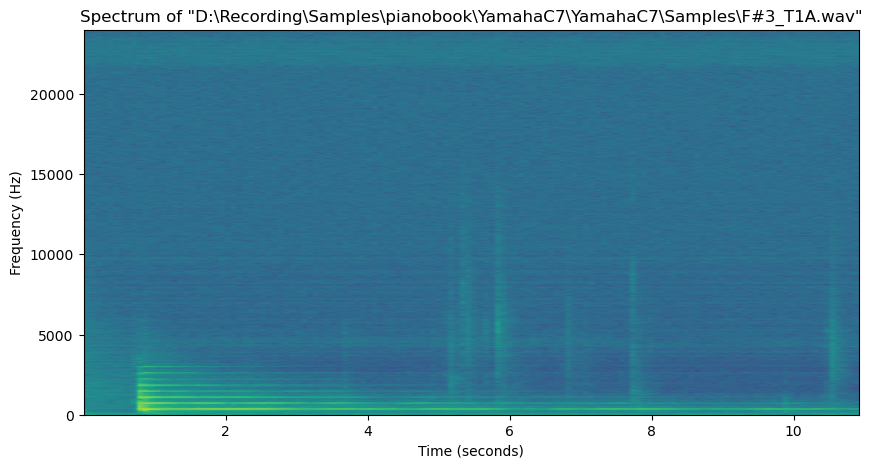

In [5]:
audiopython.spectrum.plot_fft_data(a, 0, window_size=4096)

This is simply a wrapper for the `matplotlib.specgram` function.